### Brazilian E-Commerce Public Dataset by Olist
https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
- Este é um conjunto de dados públicos de e-commerce brasileiro de pedidos feitos na Olist Store . O conjunto de dados tem informações de 100 mil pedidos de 2016 a 2018 feitos em vários marketplaces no Brasil. Seus recursos permitem visualizar um pedido de várias dimensões: do status do pedido, preço, pagamento e desempenho do frete até a localização do cliente, atributos do produto e, finalmente, avaliações escritas pelos clientes. Também lançamos um conjunto de dados de geolocalização que relaciona os códigos postais brasileiros às coordenadas lat/lng.

- Esses são dados comerciais reais, foram anonimizados e as referências às empresas e parceiros no texto da análise foram substituídas pelos nomes das grandes casas de Game of Thrones.

- São um conjunto de 9 arquivos csv.

#### Vamos trabalhar com vários arquivos de dados de uma vez

In [1]:
# importando lib
import os
# Nos diz a pasta atual
os.getcwd() 

'C:\\Users\\victor\\Desktop\\ciencia de dados\\projetos\\Brazilian E-Commerce Public Dataset by Olist'

In [2]:
caminho_pasta = os.getcwd() # colocando na variavel

In [3]:
# visualisando os arquivos dentro da nossa pasta atual
# ele lista os seus arquivos
os.listdir()

['.ipynb_checkpoints', 'bases', 'projeto.ipynb']

In [4]:
os.listdir(caminho_pasta + "/bases")

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

In [5]:
arquivos = os.listdir(caminho_pasta + "/bases")

In [6]:
import pandas as pd

for i in arquivos:
    nome_arquivo = i.replace("olist_", "").replace("_dataset.csv","")
    print(nome_arquivo) # Só printando os nomes dos arquivos
    
    arquivo = pd.read_csv(caminho_pasta +"/bases/"+i) # pegando a base
    globals()[nome_arquivo] = arquivo

customers
geolocation
orders
order_items
order_payments
order_reviews
products
sellers
product_category_name_translation.csv


### Veja o Schema do dataset 

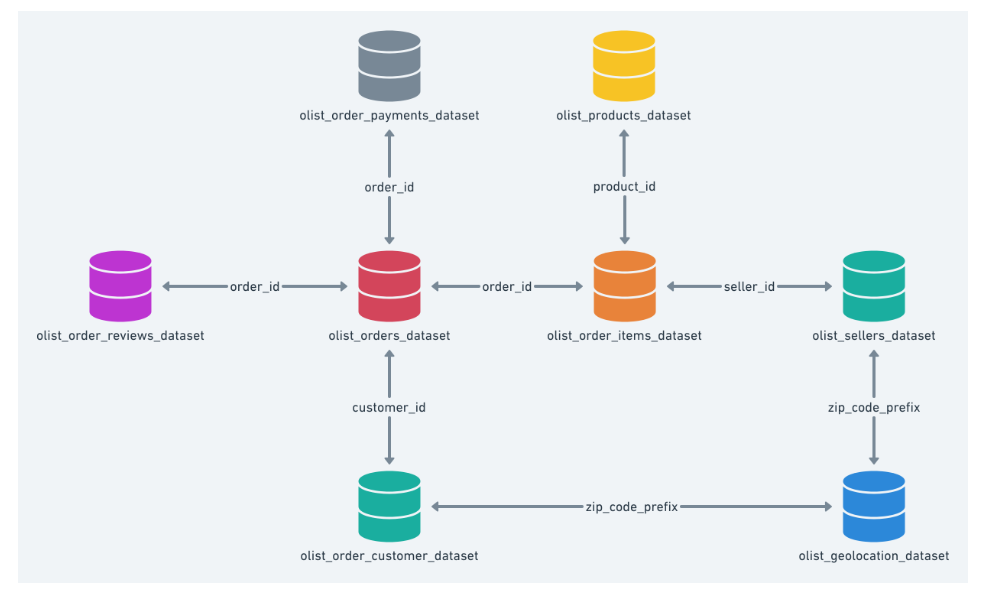

#### Perceba a conexão entre as 2 tabelas abaixo, o "order_id", podemos usar ele para fazer buscas pelas tabelas.

In [7]:
# Vendo a tabela orders
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [8]:
# Vendo a tabela orders_items
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [9]:
# Vamos usar o codigo da tabela "orders_items" para bucar na tabela "orders"
# Veja que encontramos a orderm do item com as informações da transação
code = "00010242fe8c5a6d1ba2dd792cb16214"
orders[orders["order_id"] == code]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
85267,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00


#### Vamos filtrar pelas maiores quantidades de ordens pelos itens e analisar

In [10]:
order_items.groupby(["order_id"])["order_id"].count().sort_values(ascending=False)

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: order_id, Length: 98666, dtype: int64

####  Podemos analsar tmabém o valor da ordem aonde teve mais items pedidos

In [11]:
code = "8272b63d03f5f79c56e9e4120aec44ef"
order_payments[order_payments["order_id"] == code]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
71010,8272b63d03f5f79c56e9e4120aec44ef,1,credit_card,2,196.11


#### Vamos analisar quais foram esses 21 produtos

In [12]:
order_items[order_items["order_id"] == code].groupby(["product_id"])["order_id"].count()

product_id
05b515fdc76e888aada3c6d66c201dff    10
270516a3f41dc035aa87d220228f844c    10
79ce45dbc2ea29b22b5a261bbb7b7ee7     1
Name: order_id, dtype: int64

#### Vamos ver quais produtos que contem esses 3 ids, utilizaremos a tabela "products"

In [13]:
# São produtos de beleza, de 3 diferentes tipos
products[(products["product_id"] == "05b515fdc76e888aada3c6d66c201dff") | (products["product_id"] == "270516a3f41dc035aa87d220228f844c") | (products["product_id"] == "79ce45dbc2ea29b22b5a261bbb7b7ee7")]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1962,79ce45dbc2ea29b22b5a261bbb7b7ee7,beleza_saude,27.0,152.0,2.0,1000.0,25.0,6.0,12.0
2742,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0
16218,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0


In [14]:
# Outro jeito de filtrar 
ids = ["05b515fdc76e888aada3c6d66c201dff", "270516a3f41dc035aa87d220228f844c", "79ce45dbc2ea29b22b5a261bbb7b7ee7"]

products[products["product_id"].isin(ids)]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1962,79ce45dbc2ea29b22b5a261bbb7b7ee7,beleza_saude,27.0,152.0,2.0,1000.0,25.0,6.0,12.0
2742,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0
16218,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0


#### Percebe-se que ela esta longe de ser a ordem mais cara

In [15]:
order_payments.sort_values("payment_value", ascending=False).head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66


#### Vamos analisar as formas de pagamento

In [16]:
order_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [17]:
# Temos mais transações por cartões de crédito do que das outras
order_payments.groupby(["payment_type"]).count().sort_values("order_id", ascending=False)

,order_id,payment_sequential,payment_installments,payment_value
payment_type,,,,
credit_card,76795,76795,76795,76795
boleto,19784,19784,19784,19784
voucher,5775,5775,5775,5775
debit_card,1529,1529,1529,1529
not_defined,3,3,3,3


In [18]:
# Temos mais valor monetario de transações por cartões de crédito do que das outras
payment_transactions =  order_payments.groupby(["payment_type"]).sum().sort_values("payment_value", ascending=False)
payment_transactions

,order_id,payment_sequential,payment_installments,payment_value
payment_type,,,,
credit_card,b81ef226f3fe1789b1e8b2acac839d17a9810da82917af...,77115,269332,12542084.19
boleto,0573b5e23cbd798006520e1d5b4c67148cd68144cdb62d...,19785,19784,2869361.27
voucher,5cfd514482e22bc992e7693f0e3e8df7947e9c6bfd83a0...,15029,5775,379436.87
debit_card,fa2ea4b6e84c1c0fc4f3a6d468c55183cf61ad2218e5c1...,1582,1529,217989.79
not_defined,4637ca194b6387e2d538dc89b124b0ee00b1cb0320190c...,3,3,0.00


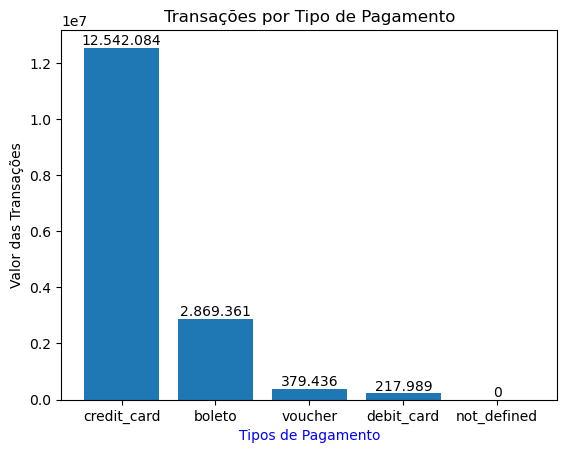

In [19]:
import matplotlib.pyplot as plt

# Supondo que order_payments e payment_transactions já estão definidos
x = order_payments["payment_type"].unique()
y = payment_transactions["payment_value"].values

fig, ax = plt.subplots()

# Criar o gráfico de barras
bars = ax.bar(x, y)

# Adicionar os valores em cima das barras
for bar in bars:
    yval = int(bar.get_height())  # Converter para inteiro
    formatted_yval = f'{yval:,}'.replace(',', '.')  # Formatar com ponto como separador de milhares
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Posição x
        yval,  # Posição y
        f'{formatted_yval}',  # Texto formatado
        ha='center',  # Alinhamento horizontal
        va='bottom'  # Alinhamento vertical
    )

# Adicionar título e rótulos se necessário
ax.set_title('Transações por Tipo de Pagamento')
ax.set_xlabel('Tipos de Pagamento', c="blue")
ax.set_ylabel('Valor das Transações')

# Mostrar o gráfico
plt.show()


#### Verificando itens que são vendidos por mais de um tipo de fornecedor

In [20]:
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [21]:
# Filtrando cada id de produto que tem valores unicos como seller_id, assim mostrará quandos vendedores unicos(cada vendedor tem seu id) tem cada produto.
order_items.groupby(["product_id"])["seller_id"].nunique().sort_values()

product_id
00066f42aeeb9f3007548bb9d3f33c38    1
aa0d48704d551d1247be98ca06dfa990    1
aa0c047aa75f7c8e437acd62601055fe    1
aa0816cf69c9faa95e573541be5c0c32    1
aa07dadb101ca2d652eaaec5c33c37af    1
                                   ..
656e0eca68dcecf6a31b8ececfabe3e8    7
36f60d45225e60c7da4558b070ce4b60    7
4298b7e67dc399c200662b569563a2b2    7
69455f41626a745aea9ee9164cb9eafd    8
d285360f29ac7fd97640bf0baef03de0    8
Name: seller_id, Length: 32951, dtype: int64

### Vamos ver a quantidade de review, ver as notas dos clientes


In [22]:
order_reviews.head(3)# vendo a tabela

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [23]:
# A maioria votou 5 estrelas e 4
reviews = order_reviews["review_score"].value_counts().sort_index(ascending=False)
reviews

review_score
5    57328
4    19142
3     8179
2     3151
1    11424
Name: count, dtype: int64